In [2]:
#Import libraries
#import argparse 
#import sys 
import requests 
from bs4 import BeautifulSoup
from collections import defaultdict 
#import dateutil.parser
#from dateutil.relativedelta import relativedelta
import datetime as dt
from urllib.parse import urljoin 
#from tinydb import TinyDB, Query
import urllib3
import xlsxwriter
import substring
import re
import pandas as pd 
import numpy as np

In [3]:
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
total_added = 0  #total_added will be used to keep track of the total number of results added to the database


In [4]:
base_url = 'https://newyork.craigslist.org/'        #base url
listings_url = urljoin(base_url, 'search/cto')  #url add searching


In [5]:
dfall = pd.DataFrame(columns=['pid', 'date', 'webpage','year','cost','pic','descr','createdt','condition','odo','reg','condition2','cnj','snj','nyc'])
dfall
dfall = dfall.astype({"pid": int})

In [6]:
dfall = pd.read_csv('df_all.csv')
    

In [7]:
dfall.dtypes

pid             int64
date           object
webpage        object
year            int64
cost            int64
pic            object
descr          object
createdt       object
condition      object
odo           float64
reg            object
condition2    float64
cnj             int64
snj             int64
nyc             int64
dtype: object

In [8]:
############### clean_money function ###################
def clean_money(amt):
    return int(amt.replace("$",""))

In [9]:
############### clean_pic  function###################    
def clean_pic(ids):
    idlist = ids.split(",")
    first = idlist[0]
    code = first.replace("1:","")
    return "https://images.craigslist.org/%s_300x300.jpg" % code    

In [10]:
def set_up(make,model):
    headers = {"User-Agent":'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'}
    response = requests.get(listings_url,headers=headers, params={'query': make + "+" + model})
    soup = BeautifulSoup(response.content)
    return soup.find_all("li", class_="result-row")
    # Search cragislist for given car attributes


In [11]:
 def test_id_dfall(id):  # id is the id to see if it is in dfall
    In_dfall = False
    for  idi in dfall['pid']:
         if id == idi:
            In_dfall = True
    return In_dfall

In [12]:
#This is for diagnostics
#res = results[119]
#clean_money(res.a.span.string.strip())
#res = results[1]
#res
#post_one_title = res.find('a', class_='result-title hdrlnk')
#xx = post_one_title.get_text()
#type(xx)
#for x in xx.split():
#    if x[:2] == '20':
#        print(x)
        
#print(xx.split()[0])


In [13]:
#df = df[0:0]
df = pd.DataFrame(columns=['pid', 'date', 'webpage','year','cost','pic','descr','createdt','condition','odo','reg','condition2','cnj','snj','nyc'])
df

,pid,date,webpage,year,cost,pic,descr,createdt,condition,odo,reg,condition2,cnj,snj,nyc


In [14]:
results = set_up("toyota","prius")

In [16]:
#dfall['pid']

In [17]:
#result=results[1]
#post_one_title = result.find('a', class_='result-title hdrlnk')
#title = post_one_title.get_text()
#post_one_link = post_one_title['href']
#response2 = requests.get(post_one_link)
#soup2 = BeautifulSoup(response2.content,"html.parser")

#second_sentence = soup2.p.find_all_next(text=True)
#second_sentence

In [18]:
#x = '200K'

#d= re.search(r'\d+', x).group(0)

#d


In [19]:
#def Search_number_String(String):
def look_more(st):
  
    num=''
    index_list = []
    del index_list[:]
    digcnt = 0
    past_dig = False
    for i, x in enumerate(st):
        if x.isdigit() == True:
            index_list.append(i)
            if past_dig == False:
                st_mark = digcnt
            digcnt=digcnt+1
            past_dig = True
        else: 
            if (x == 'k' or x == 'K') and past_dig == True:
            
                start = index_list[st_mark]
                end = index_list[digcnt-1] + 1   # add one because of way python indexes end of string.
                num = st[start:end]
                num = num + '000'
                break
            past_dig = False

    return(num)


In [20]:
#str = 'fkdkd 10 110k'
#dd =look_more(str)
#dd

In [21]:
#odometer = ''
#condition=''
#region = 'cnj'
#loopn = len(second_sentence) - 1
#for j in range(0,loopn):
#    if second_sentence[j].find("odometer:") >= 0:
#        odometer = second_sentence[j+1]
#        if len(odometer) == 3:
#            odometer = odometer + '000'
            
#odometer
        

In [22]:
#odometer = '157'
#if len(odometer) == 3:
#    odometer = odometer + '000'
#odometer

In [23]:
noofresults = len(results) - 1
total_added = 0
#loop 
try:   # this is for the exception handling
  for i in range(0, noofresults):    
    result=results[i]
    post_one_title = result.find('a', class_='result-title hdrlnk')
    title = post_one_title.get_text()
    for t in title.split():
        if t[:2] == '20':
            Year = t

    post_one_link = post_one_title['href']
    response2 = requests.get(post_one_link)

    soup2 = BeautifulSoup(response2.content,"html.parser")

    second_sentence = soup2.p.find_all_next(text=True)
    odometer = ''
    condition=''
    region = 'nyc'
    loopn = len(second_sentence) - 1
    for j in range(0,loopn):
        if second_sentence[j].find("odometer:") >= 0:
            odometer = second_sentence[j+1]
            if len(odometer) == 3:
                odometer = odometer + '000'
        if second_sentence[j].find("condition") >= 0:
            condition = second_sentence[j+1]
    if odometer=='':
        for j in range(0,loopn):
            odometer = look_more(second_sentence[j])
            if odometer != '':
                break
    if condition == '':
        for t in title.split():
            if t.upper() == 'EXCELLENT':
                condition = t 
            if t.upper() == 'GOOD':
                condition = t
    condition_n = 2.5
    if condition.upper() == 'EXCELLENT':
        condition_n = 4
    if condition.upper() == 'GOOD':
        condition_n = 3
    if condition.upper() == 'FAIR':
        condition_n = 2

    rec = {
    'pid': result['data-pid'],
    'date': result.p.time['datetime'],
    'webpage': result.a['href'],
    'year': Year,
    'cost': clean_money(result.a.span.string.strip()),
    'pic': clean_pic(result.a['data-ids']),
    'descr': result.p.a.string.strip(),
    'createdt': dt.datetime.now().isoformat(),
    'condition': condition,
    'odo': odometer,
    'reg': region,
    'condition2':condition_n,
    'cnj':0,
    'snj':0,
    'nyc':1
    }
  #  print(rec)
 #   
    df =df.append([rec])  
    if test_id_dfall(int(result['data-pid'])) == False:  # test to see if in dfall
       
        inyes = False
        print(inyes)
        for t in title.split():
            if t.upper() == 'TOYOTA':
                inyes = True 
            if t.upper() == 'PRIUS':
                inyes = True 
        if inyes:         
            total_added += 1
            print ("Adding ... ", total_added)
            dfall = dfall.append([rec])
#            df.to_csv('dfcng.csv', index=False)
# two types of error, AttributeError is primarily for the Cost and the KeyError is for empty tags.
except (AttributeError, KeyError) as ex:
  pass


False


In [24]:
len(dfall)

96

In [25]:
dfall.iloc[88]

pid                                                  6952609043
date                                           2019-08-08 19:16
webpage       https://newyork.craigslist.org/que/cto/d/middl...
year                                                       2011
cost                                                        300
pic           https://images.craigslist.org/00z0z_bgxCSerfeA...
descr                            Toyota Prius for rent Tlc Uber
createdt                             2019-08-09T12:47:36.404024
condition                                                   NaN
odo                                                         NaN
reg                                                         nyc
condition2                                                  2.5
cnj                                                           0
snj                                                           0
nyc                                                           1
Name: 88, dtype: object

In [26]:
len(dfall)

96

In [27]:
df['odo'][:80]

0    110000
0    117000
0    104735
0    187000
0    142000
0     98901
0          
0     79000
0      2000
0    148451
0     30590
0    148500
0    196800
0    122344
0     72000
0    182500
0    170000
0    111200
0    210000
0     78000
0    124000
0     86000
0    187000
0    142000
0     66800
0    280000
0    105067
0    120000
0      5000
0    140000
0     95000
0    187000
0    142000
0     70000
0    200000
0    180000
0     35000
0    142000
0    105000
0    100430
0    223000
0     30590
0      5000
0    114000
0      5000
0    179000
0    105067
0     49500
0    185425
0    155000
Name: odo, dtype: object

In [28]:
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [29]:
df1 = dfall[['year','odo','condition2','cost','cnj','snj','nyc']]
df1

,year,odo,condition2,cost,cnj,snj,nyc
0,2006,230000.0,2.5,3300,1,0,0
1,2011,259000.0,4.0,3950,1,0,0
2,2010,220000.0,4.0,2500,1,0,0
3,2017,34672.0,4.0,15995,1,0,0
4,2008,50842.0,2.5,5800,1,0,0
5,2012,78000.0,4.0,8500,0,0,1
6,2012,124000.0,4.0,5200,0,0,1
7,2007,44000.0,2.5,5900,0,0,1
8,2006,86000.0,2.5,4400,0,0,1
9,2014,14315.0,2.5,13000,0,0,1


In [30]:
df1.dtypes


year            int64
odo           float64
condition2    float64
cost            int64
cnj             int64
snj             int64
nyc             int64
dtype: object

In [31]:
df1 = df1[(df1['odo'] !="") ]
df1

C:\Users\don_m\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,year,odo,condition2,cost,cnj,snj,nyc
0,2006,230000.0,2.5,3300,1,0,0
1,2011,259000.0,4.0,3950,1,0,0
2,2010,220000.0,4.0,2500,1,0,0
3,2017,34672.0,4.0,15995,1,0,0
4,2008,50842.0,2.5,5800,1,0,0
5,2012,78000.0,4.0,8500,0,0,1
6,2012,124000.0,4.0,5200,0,0,1
7,2007,44000.0,2.5,5900,0,0,1
8,2006,86000.0,2.5,4400,0,0,1
9,2014,14315.0,2.5,13000,0,0,1


In [32]:
df2 = df1[(pd.notna(df1['odo']))]

In [33]:
df2.iloc[:,1]

0      230000.0
1      259000.0
2      220000.0
3       34672.0
4       50842.0
5       78000.0
6      124000.0
7       44000.0
8       86000.0
9       14315.0
10     187000.0
11     142000.0
12      66800.0
13      85000.0
14     105067.0
15     145000.0
16     140000.0
17     140000.0
18      95000.0
19     187000.0
20     142000.0
21      70000.0
22     200000.0
23     180000.0
24      35000.0
25     142000.0
26     105000.0
27     100430.0
28     126939.0
29      29990.0
        ...    
65     211200.0
66     168000.0
67      54000.0
68     136000.0
69     181285.0
70     128000.0
71       2000.0
72     148451.0
73     104735.0
74      30590.0
75    1485000.0
76     196800.0
77     122344.0
78      72000.0
79     182500.0
80     170000.0
81     111200.0
82     210000.0
83     120000.0
84       5000.0
85     223000.0
86       5000.0
87      98901.0
89      79000.0
90     110000.0
91     117000.0
92     104735.0
93     187000.0
94     142000.0
95     155000.0
Name: odo, Length: 94, d

In [34]:
 #df2['odo'].isnumeric()
    
df2.iloc[:,1] = pd.to_numeric(df2['odo'], downcast='integer')   


C:\Users\don_m\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [35]:
df2.dtypes

year            int64
odo             int32
condition2    float64
cost            int64
cnj             int64
snj             int64
nyc             int64
dtype: object

In [36]:
df2 =df2[df2['odo']>10000]

In [37]:
len(df2)

89

In [38]:

df_X = df2[['year','odo','condition2','cnj','snj','nyc']]
df_y = df2['cost']

In [39]:
df_X

,year,odo,condition2,cnj,snj,nyc
0,2006,230000,2.5,1,0,0
1,2011,259000,4.0,1,0,0
2,2010,220000,4.0,1,0,0
3,2017,34672,4.0,1,0,0
4,2008,50842,2.5,1,0,0
5,2012,78000,4.0,0,0,1
6,2012,124000,4.0,0,0,1
7,2007,44000,2.5,0,0,1
8,2006,86000,2.5,0,0,1
9,2014,14315,2.5,0,0,1


In [40]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df_X, df_y)

# Make predictions using the testing set
y_pred = regr.predict(df_X)



In [41]:
coeff_df = pd.DataFrame(regr.coef_, df_X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
year,735.650748
odo,-0.004892
condition2,210.269876
cnj,146.620884
snj,0.000000
nyc,-146.620884


In [42]:
regr.intercept_ 

-1472088.2176238438

In [43]:
y_pred

array([ 3174.3965185 ,  7026.19704033,  6481.32088373, 12537.43697226,
        5522.0773509 ,  8353.99578863,  8128.97960448,  4526.65354769,
        3585.55324075,  9821.41759383,  3827.14671435,  6254.22348483,
       10615.73458032,  5061.74639193,  5278.99034087,  6975.1992638 ,
        7315.06235814,  4897.84024   ,  9426.73431517,  3827.14671435,
        6254.22348483,  5135.12123459,  4499.20593155,  4597.03905509,
        8248.9321908 ,  3416.75543264,  2021.31027837,  8979.92668808,
        5592.24597101, 11216.04237826,  6901.82442115, 10805.09434281,
        3866.27996377,  5278.99034087,  2744.69621544, 10700.36023219,
        6041.80331534,  8094.04391069,  7153.45144092,  4333.13985534,
        3925.24075009,  4062.66258041,  8468.75998217,  5090.28454009,
        7498.83803702,  3602.38076401, 10695.11253307,  9130.75277741,
        6351.79900502,  2937.69470107,  5488.96519691,  6520.76659269,
        6459.41544092,  5074.07012826,  5712.83184186,  5736.80095713,
      

In [44]:

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(df_y, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df_y, y_pred))


Mean squared error: 5522347.45
Variance score: 0.52


Text(0, 0.5, 'Predicted Y')

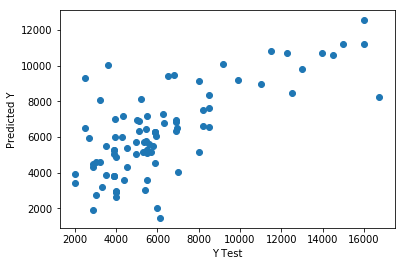

In [45]:
plt.scatter(df_y,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [46]:
len(df)

50

In [47]:
dfall.to_csv('df_all.csv', index=False)

In [48]:
print (total_added)
    

0


In [49]:
df.iloc[:,9] = pd.to_numeric(df['odo'], downcast='integer')   

In [50]:
df1.dtypes

year            int64
odo           float64
condition2    float64
cost            int64
cnj             int64
snj             int64
nyc             int64
dtype: object

In [51]:
df1 =df1[df1['odo']>10000]

In [52]:
#df1['odo'][(df1['odo'] =="")] = 250000 

In [53]:
df1



,year,odo,condition2,cost,cnj,snj,nyc
0,2006,230000.0,2.5,3300,1,0,0
1,2011,259000.0,4.0,3950,1,0,0
2,2010,220000.0,4.0,2500,1,0,0
3,2017,34672.0,4.0,15995,1,0,0
4,2008,50842.0,2.5,5800,1,0,0
5,2012,78000.0,4.0,8500,0,0,1
6,2012,124000.0,4.0,5200,0,0,1
7,2007,44000.0,2.5,5900,0,0,1
8,2006,86000.0,2.5,4400,0,0,1
9,2014,14315.0,2.5,13000,0,0,1


In [54]:
df_X1 = df1[['year','odo','condition2','cnj','snj','nyc']]

In [55]:
y_predall = regr.predict(df_X1)
    

In [56]:
df1['y_pred'] = y_predall

C:\Users\don_m\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
df1['delta_cost'] = df1['cost'] - y_predall 

C:\Users\don_m\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
today = dt.datetime.today().strftime('%m%d%Y')  
output_file = 'priusnyc_{}.csv'.format(today)

In [59]:
output_file

'priusnyc_08102019.csv'

In [60]:
df1.to_csv(output_file, index=False)